In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from final_project_code import FinalProject 
from newton_raphson import Newton_Raphson
from final_plot import plot_stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [4]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
# from sklearn.metrics.pairwise import rbf_kernel
FP = FinalProject()

In [6]:
df = pd.read_csv("./AG_Corp_Prod_DataBase.csv")

/tmp/ipykernel_11764/139095848.py:1: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")


In [8]:
df = FP.create_balanced_data(df)
# df = df.sample(n=10000, replace=False)

df incorporated have 2393 many rows
after balancing, df not incorporated have 2393 many rows


In [9]:
FP = FinalProject()
train, validate, test = FP.split_data(df)

In [10]:
cols=['TotalWorkers','TotalPower']
# RegionCoded is not generated here
cols = ["RegionCoded", "FactoryisCorpin1900", "NEWDEV"]
cols = cols[1:]

In [11]:
df_train, X_train, y_train = FP.prepare_data(train)
df_validate, X_validate, y_validate= FP.prepare_data(validate)
df_test, X_test, y_test = FP.prepare_data(test)

In [12]:
cols = ['PowerperWorker', 'RevperGrandWorker']
cols = ['logWorkers', 'logPower'] 
X_train = X_train.fillna(0)
print(X_train[cols].shape)
beta_old = np.ones((X_train[cols].shape[1],1))
print(beta_old.shape)
X_train = X_train[cols]
X_train = X_train.to_numpy()

y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
print(y_train.shape)

X_test = X_test[cols].fillna(0)
X_test = X_test.to_numpy()
y_test = y_test.fillna(0)
y_test = y_test.to_numpy()

(2871, 2)
(2, 1)
(2871, 1)


In [13]:
from newton_raphson import Newton_Raphson
NR = Newton_Raphson() 
NR.regress(y = y_train, X = X_train, max_iters = 1e3, tol=1e-15, converged=False)

learning rate is: 0.5
Regularization is: True
number of iteration: 10
beta: [[ 1.01023903]
 [ 0.10986377]
 [-4.47201528]]
number of iteration: 20
beta: [[ 1.016144  ]
 [ 0.1123405 ]
 [-4.49971424]]
number of iteration: 30
beta: [[ 1.01615191]
 [ 0.11234297]
 [-4.49975102]]
number of iteration: 40
beta: [[ 1.01615192]
 [ 0.11234297]
 [-4.49975106]]
number of iteration: 50
beta: [[ 1.01615192]
 [ 0.11234297]
 [-4.49975107]]
Converged with 56 iterations
The beta we end up with is: [[ 1.01615192]
 [ 0.11234297]
 [-4.49975107]]


the weight beta is: [[ 1.01615192]
 [ 0.11234297]
 [-4.49975107]]


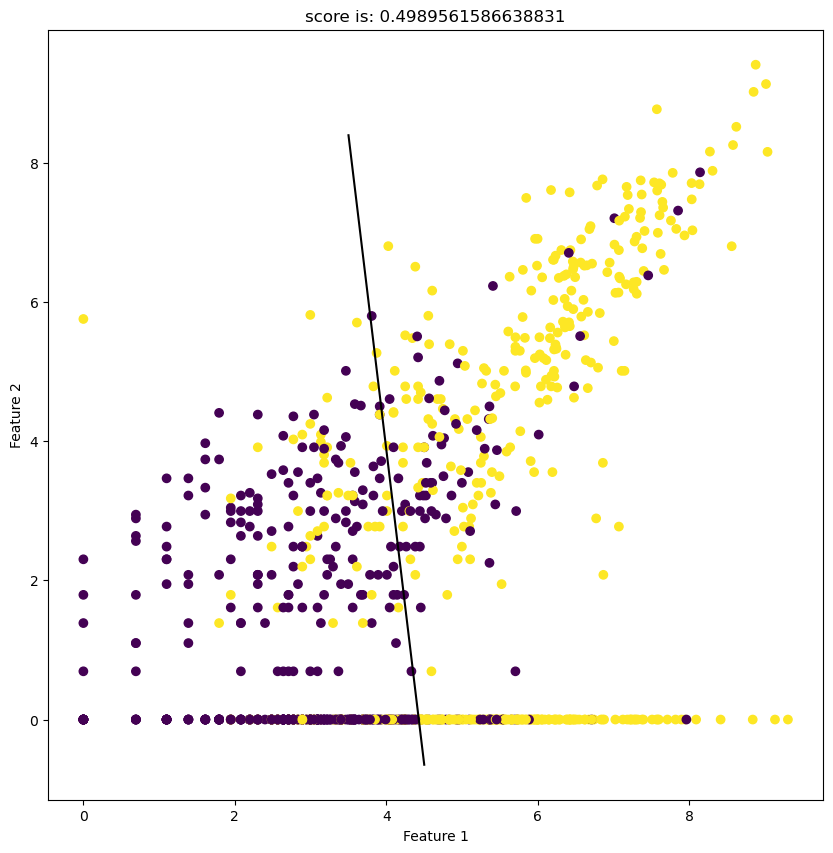

In [14]:
# from final_project_code import Newton_Raphson 
from final_plot import plot_stuff
PS = plot_stuff()
# NR = Newton_Raphson()
# df_train, X_train, y_train = FP.prepare_data(train)
# cols = ['logWorkers', 'logPower', 'Cotton']
# cols = ['logWorkers', 'logPower'] 
# X_train = X_train[cols].fillna(0)
# y_train = y_train.fillna(0)
# PS.plot_regions(NR, X_train,y_train)
# fig,axarr = plt.subplots(1,2)
# plt.rcParams["figure.figsize"] = (4,4)
# axarr[0].plot()
# NR.bare_bone_plot(X_train, y_train)
# axarr[1].plot()
NR.bare_bone_plot(X_test,y_test)

the weight beta is: [[ 1.01615192]
 [ 0.11234297]
 [-4.49975107]]


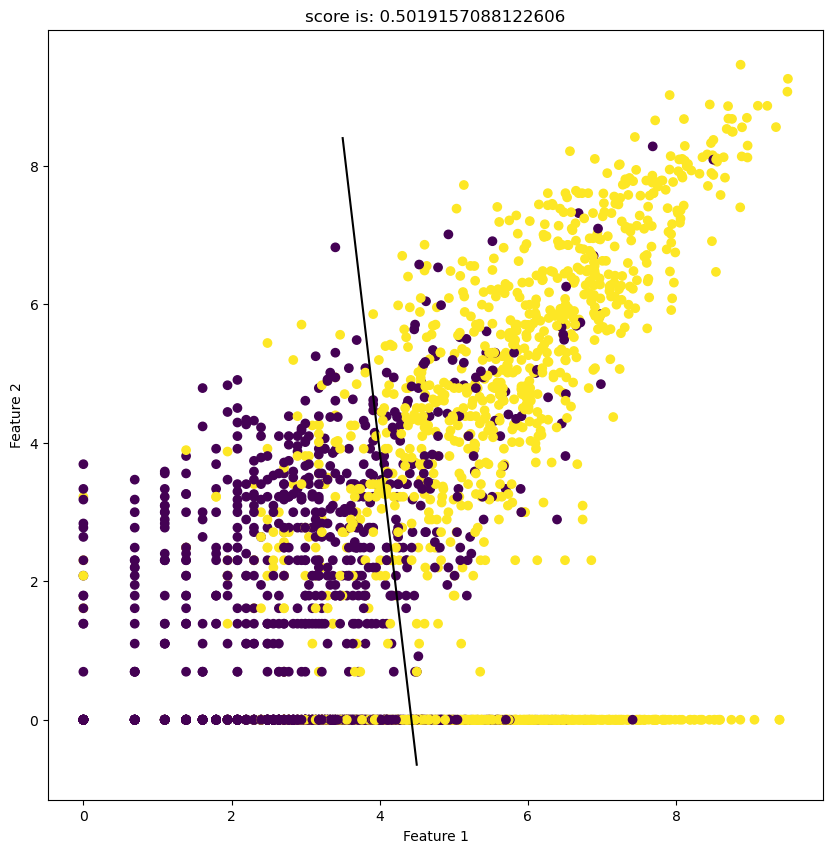

In [15]:
NR.bare_bone_plot(X_train, y_train)

In [16]:
# from final_plot import plot_stuff
# PS = plot_stuff()
# y_hat = NR.predict(X_train)
# PS.draw(X_train, y_train, y_hat)
cols = ['logWorkers', 'logPower'] 

In [17]:
LR = LogisticRegression(solver="newton-cg")
LR.fit(X_train, y_train)
LR.coef_

/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.01449468, 0.11250428]])

In [18]:
LRscore = LR.score(X_test, y_test)

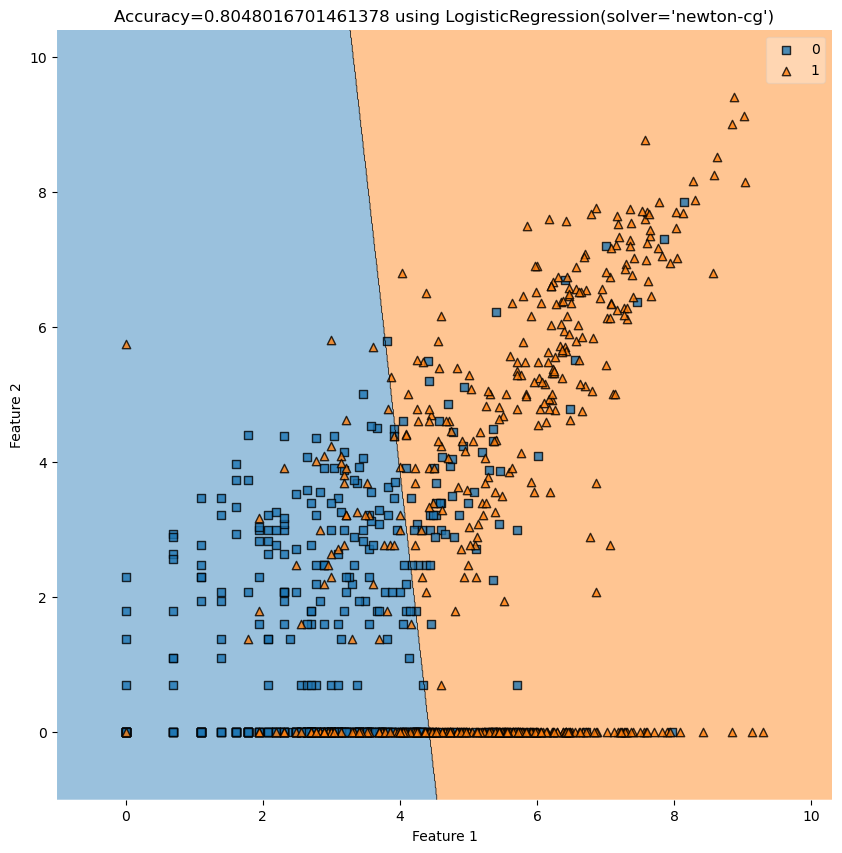

In [19]:
NR.simple_plot(LR, X_test, y_test)

[[1.01449468 0.11250428]]
1.0144946779834925
0.11250427888218656
-4.493155154559585


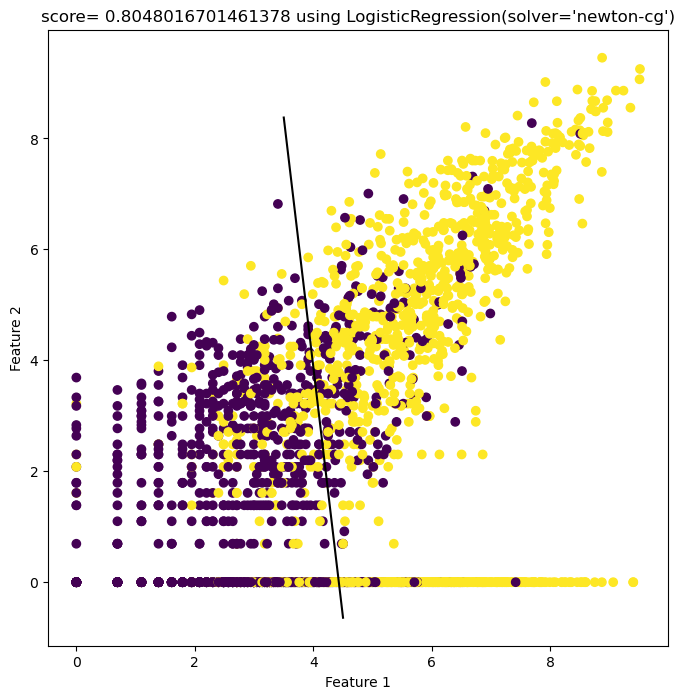

In [25]:
print(LR.coef_)
a_0 = LR.coef_[0][0]
a_1 = LR.coef_[0][1]
print(a_0)
print(a_1)
print(LR.intercept_[0])
plt.rcParams["figure.figsize"] = (8,8)
fig = plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
f1 = np.linspace(3.5,4.5, 501)
p = plt.plot(f1, - (LR.intercept_/a_1) - (a_0/a_1)*f1, color = "black")
title = plt.gca().set_title(f"score= {LRscore} using {LR}")

In [21]:
from newton_raphson import Newton_Raphson
NR2 = Newton_Raphson()

In [22]:
DTree = DecisionTreeClassifier(random_state=0)
DTree.fit(X_train, y_train)
DTree.score(X_train, y_train)

0.920236851271334

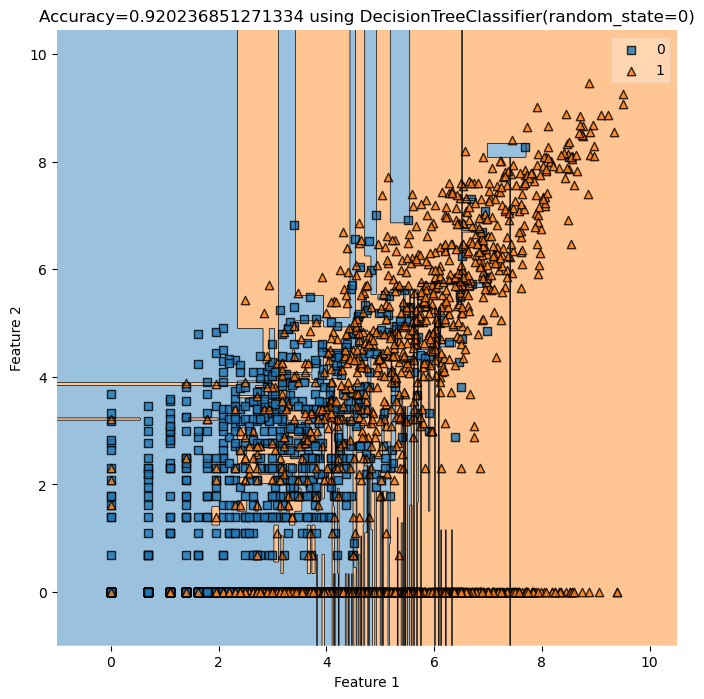

In [26]:
y_train = y_train.reshape(-1)
NR2.simple_plot(DTree, X_train, y_train)

In [28]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
RandomForest.score(X_train, y_train)

0.920236851271334

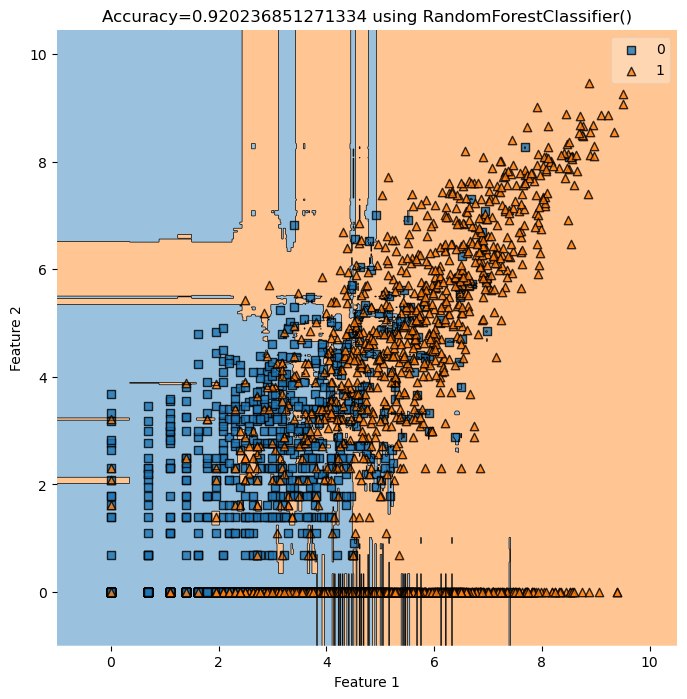

In [29]:
NR2.simple_plot(RandomForest, X_train, y_train)

In [ ]:
SVC2 = SVC(kernel="linear", gamma = "auto", shrinking=False)

In [ ]:
SVC2.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', shrinking=False)

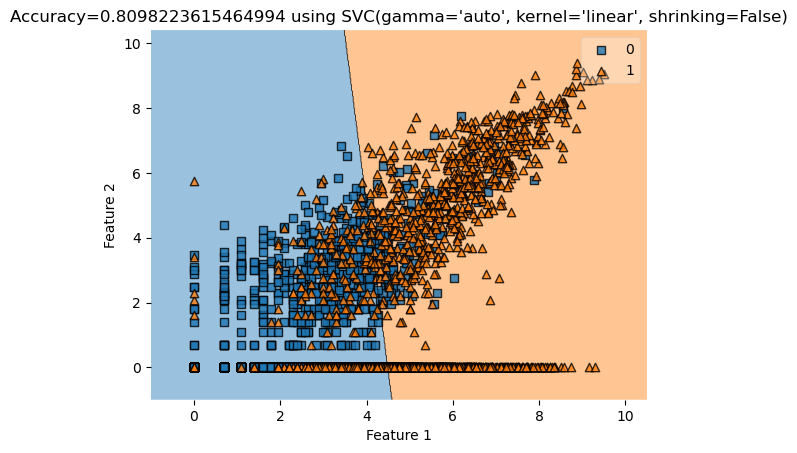

In [ ]:
NR2.simple_plot(SVC2, X_train, y_train)

In [ ]:
X_train.shape

(2871, 2)